# Example of using CNN on CIFAR100 Dataset

I mostly copy/pasted code from the notebooks 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import os 
os.environ['KERAS_BACKEND'] = 'torch'

import keras
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image as image_utils



from helpers_plot_history import plot_history # Some helper functions for the CNN notebooks.

In [2]:
# Losd the cifar100 dataset

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

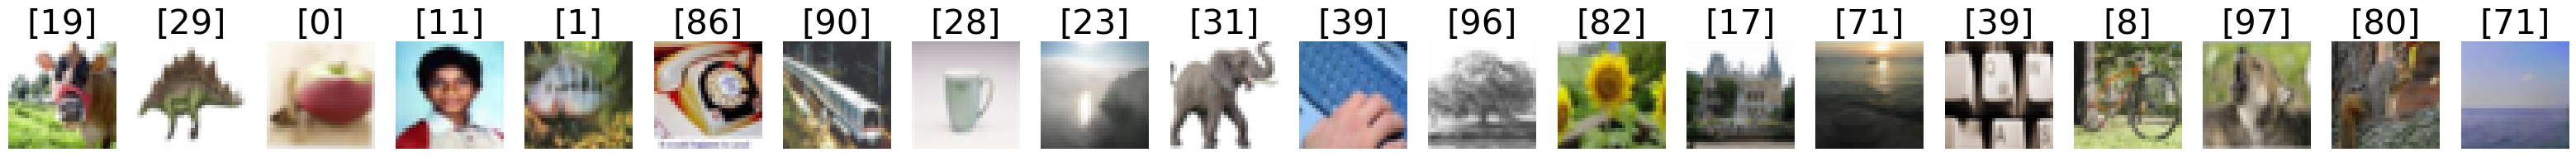

In [3]:
plt.figure(figsize=(40,40))

num_images = 20
for i in range(num_images):
    image = x_train[i]
    label = y_train[i]
    
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image)

In [4]:
print(x_train.min(), x_train.max())

0 255


In [5]:
# Normalize the data
x_train = x_train/255
x_test = x_test/255

In [7]:
num_classes=100
batch_size=64

In [8]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [9]:
# Define the augmentation pipeline
data_augmentation = keras.Sequential([
  keras.layers.RandomRotation(10/360),         # 10° rotation
  keras.layers.RandomTranslation(0.1, 0.1),      # width & height shifts of 10%
  keras.layers.RandomZoom(0.1, 0.1),             # zoom in/out up to 10%
  keras.layers.RandomFlip("horizontal")          # horizontal flip only
])

In [10]:
from keras.models import Sequential
from keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(data_augmentation)
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

In [11]:
# Compile the new model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=6,
    validation_data=(x_test, y_test)
)

Epoch 1/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 242s 307ms/step - accuracy: 0.1038 - loss: 4.0181 - val_accuracy: 0.2144 - val_loss: 3.2826
Epoch 2/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 238s 305ms/step - accuracy: 0.2184 - loss: 3.1984 - val_accuracy: 0.2099 - val_loss: 3.6059
Epoch 3/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 239s 305ms/step - accuracy: 0.2680 - loss: 2.9640 - val_accuracy: 0.2659 - val_loss: 3.0920
Epoch 4/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 238s 304ms/step - accuracy: 0.2990 - loss: 2.8143 - val_accuracy: 0.2546 - val_loss: 3.2471
Epoch 5/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 238s 304ms/step - accuracy: 0.3194 - loss: 2.6884 - val_accuracy: 0.3138 - val_loss: 2.7396
Epoch 6/6
782/782 ━━━━━━━━━━━━━━━━━━━━ 238s 304ms/step - accuracy: 0.3394 - loss: 2.6055 - val_accuracy: 0.3199 - val_loss: 2.7427


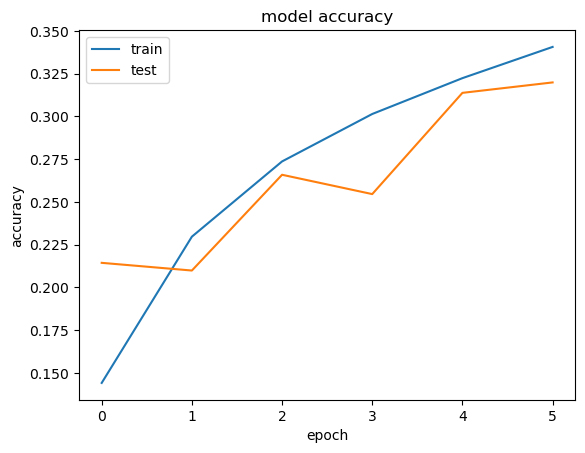

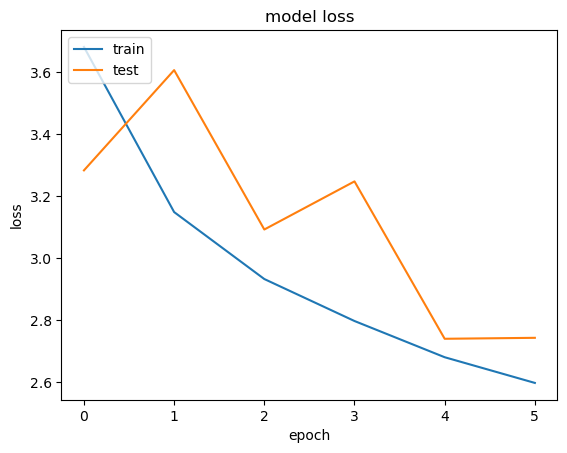

In [13]:
plot_history(history)

## Conclusion
This is a reasonable start, but probably needs more epochs of training...